| Changes | Time | Difficulty | 
|---------|------|------------|
|Using randomforest with number of estimators of 100 and training split of 80% and get an accuracy of 90%|45 mins|5|
|Confusion Matrix shows that the model sometimes predict good wine as bad wine|10 mins|1|
|Try several different training split , depth of trees and number of estimators. The accuracy move between 889% and 92%The best accuracy is when the training split is 75% training with 92% accuracy| 1 hour 30 mins.|8|
|Switch to extra tree classifier and with the same parameters and get an accuracy of 92%| 20 mins |2|
|Try changing the number of estimators and training split and was staying around 89% and 92% accuracy| 40 mins |4|

In [1]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("wine_data.csv") 

X = df.iloc[:, :-1]  # exclude quality
y = (df["quality"] > 6.5).astype(int) # if score above 6.5 , its good wine and label with 1 , else 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

training_timer_start = time.time()
model.fit(X_train, y_train)
training_timer_stop = time.time()

predict_timer_start = time.time()
predictions = model.predict(X_test)
predict_timer_start = time.time()

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))

print(f'training time : { training_timer_stop - training_timer_start:.4f} seconds')

Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       347
           1       0.76      0.53      0.62        53

    accuracy                           0.92       400
   macro avg       0.84      0.75      0.79       400
weighted avg       0.91      0.92      0.91       400

training time : 0.1346 seconds


In [3]:
import random
#The features are based on the dataset
wine_test = [
    random.uniform(5, 15),  # fixed acidity
    random.uniform(0.1, 1.5),  # volatile acidity
    random.uniform(0.1, 1),  # citric acid
    random.uniform(0.1, 12),  # residual sugar
    random.uniform(0.01, 0.5),  # chlorides
    random.uniform(1, 70),  # free sulfur dioxide
    random.uniform(5, 250),  # total sulfur dioxide
    random.uniform(0.99, 1),  # density
    random.uniform(2.5, 4),  # pH
    random.uniform(0.3, 2),  # sulphates
    random.uniform(5, 15)   # alcohol
]
wine_test_df = pd.DataFrame([wine_test], columns=X.columns)

result = model.predict(wine_test_df)
print('bad wine' if result[0] < 1 else 'good wine')

bad wine


In [4]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print(f"Cross-validation accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Cross-validation accuracy: 0.9066 ± 0.0196


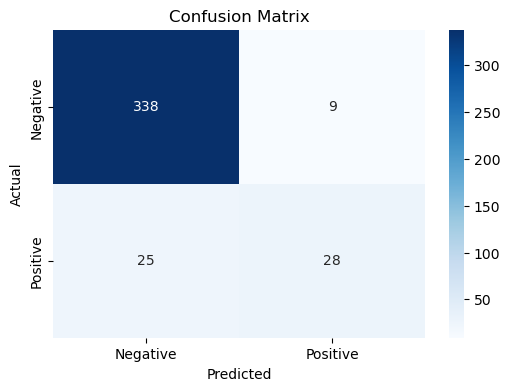

In [5]:
cm = confusion_matrix(y_test,predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [6]:
import sklearn.ensemble
print(dir(sklearn.ensemble))

['AdaBoostClassifier', 'AdaBoostRegressor', 'BaggingClassifier', 'BaggingRegressor', 'BaseEnsemble', 'ExtraTreesClassifier', 'ExtraTreesRegressor', 'GradientBoostingClassifier', 'GradientBoostingRegressor', 'HistGradientBoostingClassifier', 'HistGradientBoostingRegressor', 'IsolationForest', 'RandomForestClassifier', 'RandomForestRegressor', 'RandomTreesEmbedding', 'StackingClassifier', 'StackingRegressor', 'VotingClassifier', 'VotingRegressor', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_bagging', '_base', '_forest', '_gb', '_gradient_boosting', '_hist_gradient_boosting', '_iforest', '_stacking', '_voting', '_weight_boosting']


In [7]:
rf_classifier = sklearn.ensemble.RandomForestClassifier()
print(rf_classifier.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [8]:
df = pd.read_csv("wine_data.csv") 

# Define features and target
X = df.iloc[:, :-1]  # exclude quality
y = (df["quality"] > 6.5).astype(int)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = ExtraTreesClassifier(n_estimators=100, random_state=42)
training_timer_start = time.time()
model.fit(X_train, y_train)
training_timer_stop = time.time()

predict_timer_start = time.time()
predictions = model.predict(X_test)
predict_timer_start = time.time()

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))
print(f'training time : { training_timer_stop - training_timer_start:.4f} seconds')

Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       347
           1       0.78      0.53      0.63        53

    accuracy                           0.92       400
   macro avg       0.85      0.75      0.79       400
weighted avg       0.91      0.92      0.91       400

training time : 0.0761 seconds


In [20]:
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print(f"Cross-validation accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Cross-validation accuracy: 0.9008 ± 0.0159


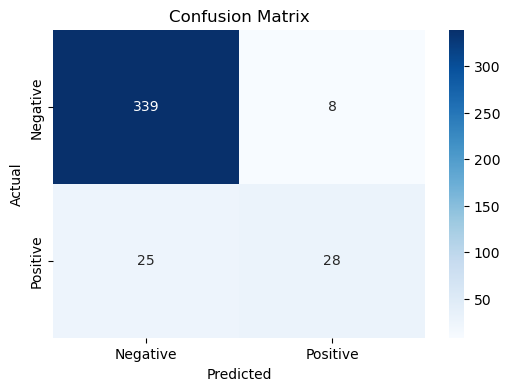

In [9]:
cm = confusion_matrix(y_test,predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()